In [36]:
# IMPORTING LIBRARIES
# For data handling
import pandas as pd
import numpy as np
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# BASIC INFORMATION ABOUT THE DATASET
# Shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (3276, 10)


In [4]:
# Column names and data types
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [5]:
# Count of missing values per column
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [6]:
# Summary statistics (mean, std, min, max, etc.)
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.78

In [7]:
# Fill missing values with the median of each column
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

In [8]:
# Confirm that missing values are gone
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


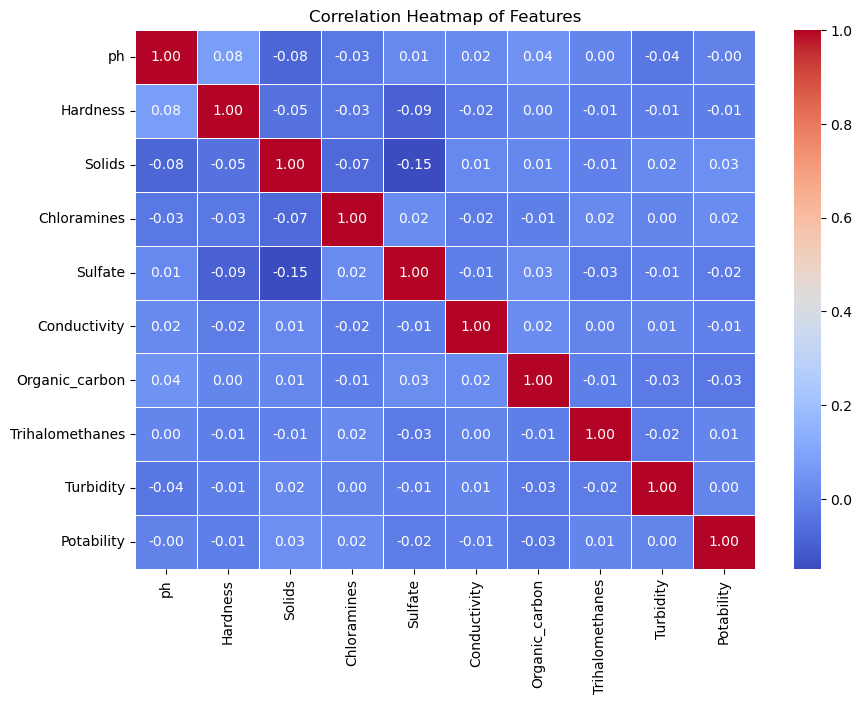

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

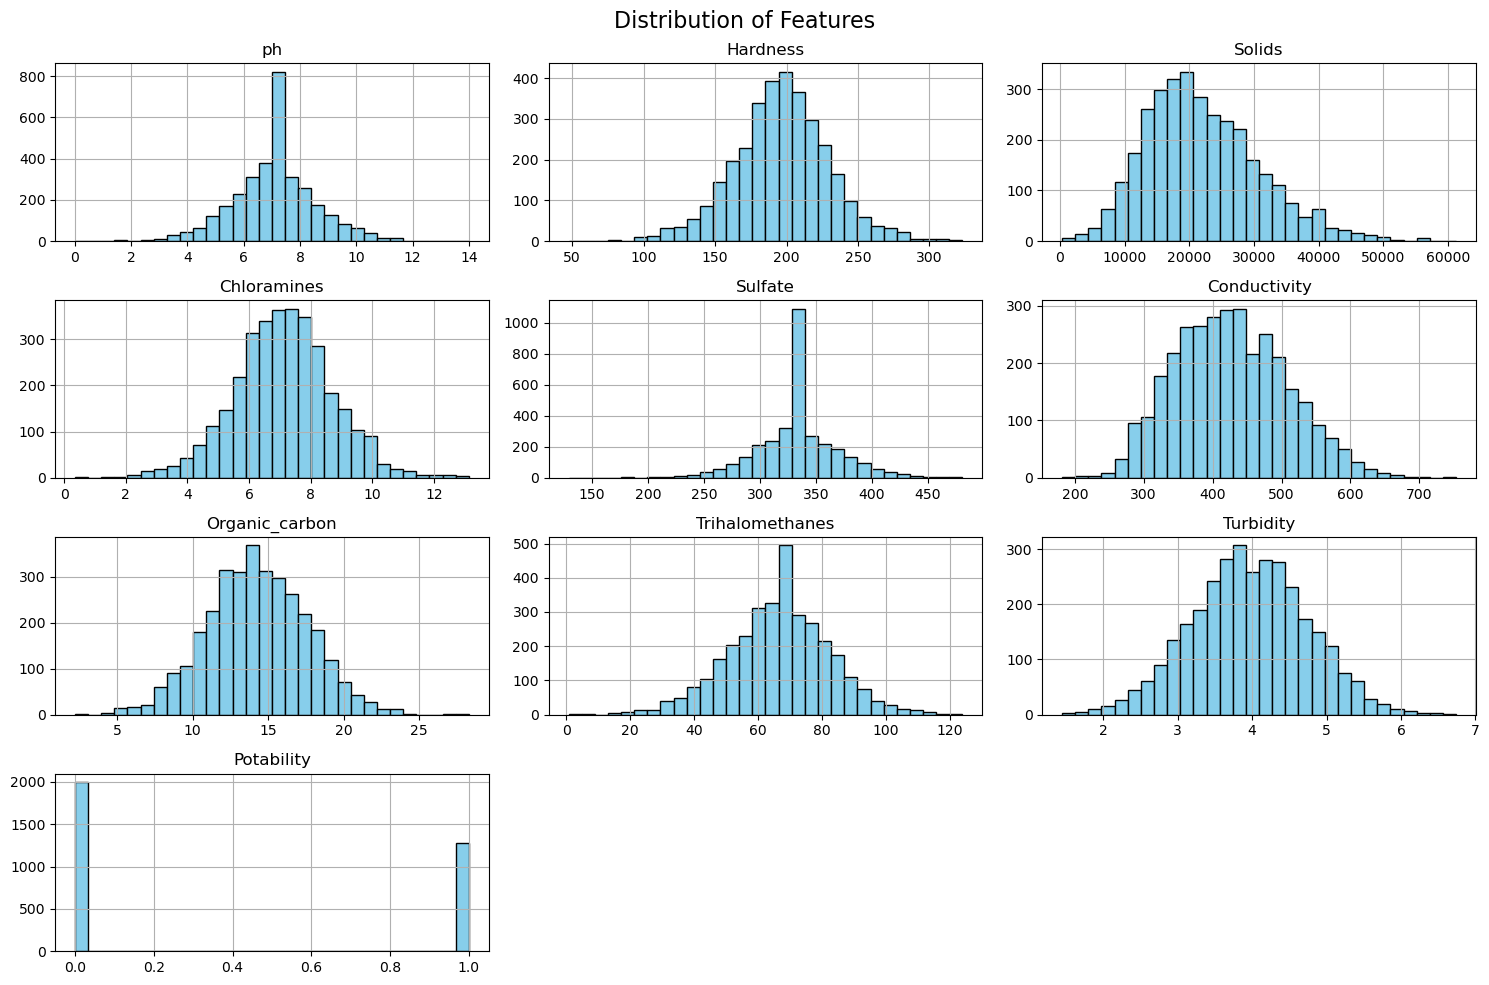

In [10]:
# Histograms for All Features
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Features", fontsize=16)
plt.tight_layout()
plt.show()

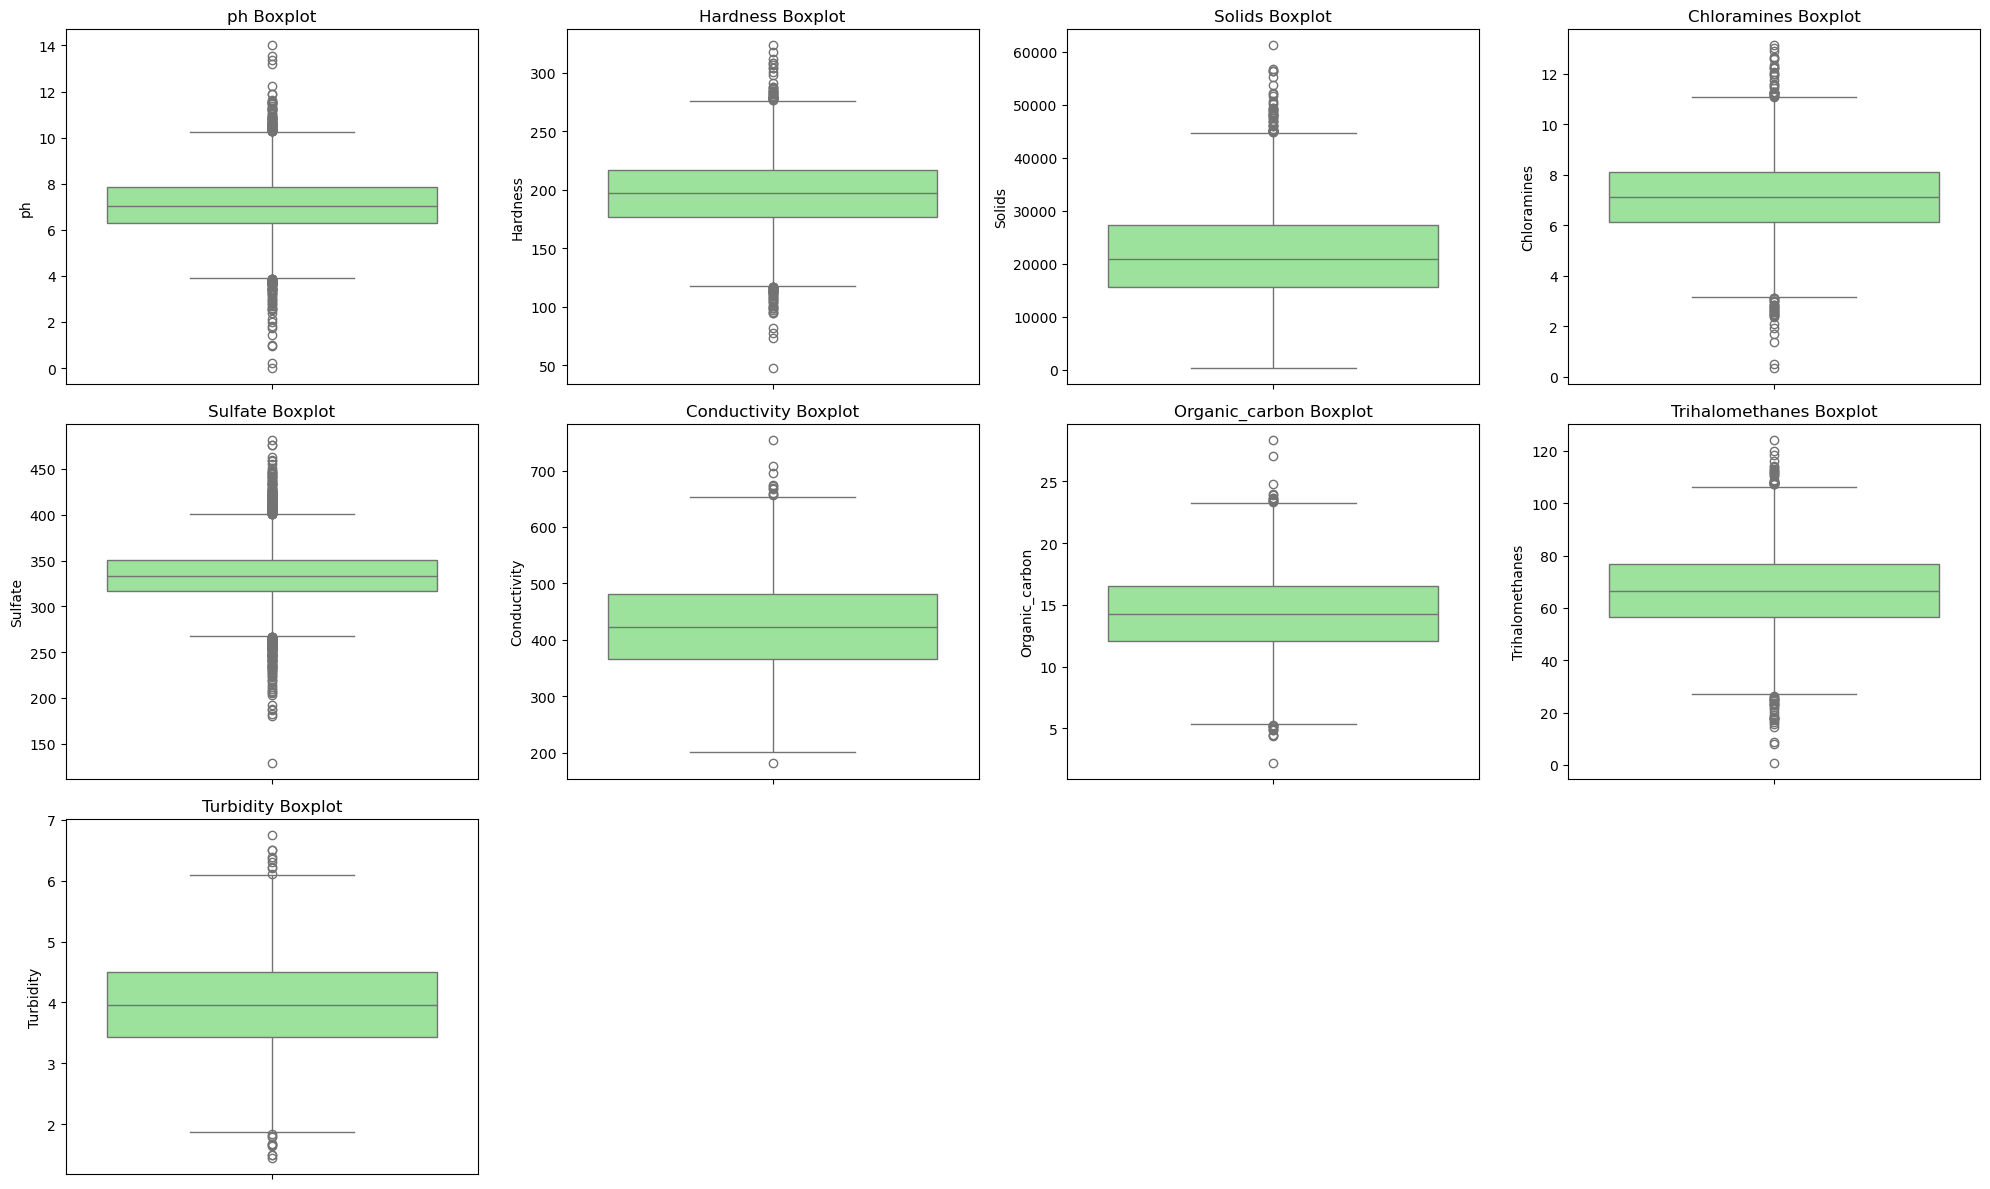

In [12]:
# Boxplots for Outlier Detection
import math

# Exclude target column
feature_cols = df.drop('Potability', axis=1).columns
num_features = len(feature_cols)

# Determine number of rows and columns for subplot grid
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, column in enumerate(feature_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f"{column} Boxplot")

plt.tight_layout()
plt.show()

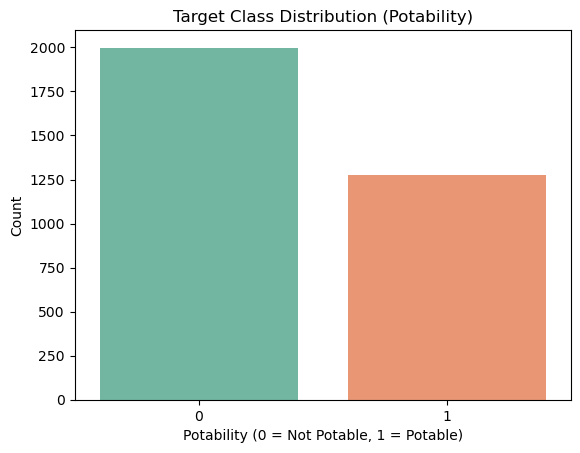

In [14]:
# Target Variable Distribution
sns.countplot(data=df, x='Potability', hue='Potability', palette='Set2', legend=False)
plt.title("Target Class Distribution (Potability)")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()

In [15]:
# Check class balance
print("Potability Value Counts:\n", df['Potability'].value_counts())

Potability Value Counts:
 Potability
0    1998
1    1278
Name: count, dtype: int64


In [16]:
# Split features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3276, 9)
Target shape: (3276,)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (2620, 9)
Testing set size: (656, 9)


Logistic Regression Evaluation Metrics
Accuracy     : 0.5259
Precision    : 0.4159
Recall       : 0.5312 (Sensitivity)
Specificity  : 0.5225
Sensitivity  : 0.5312
F1 Score     : 0.4666

Confusion Matrix:
[[209 191]
 [120 136]]


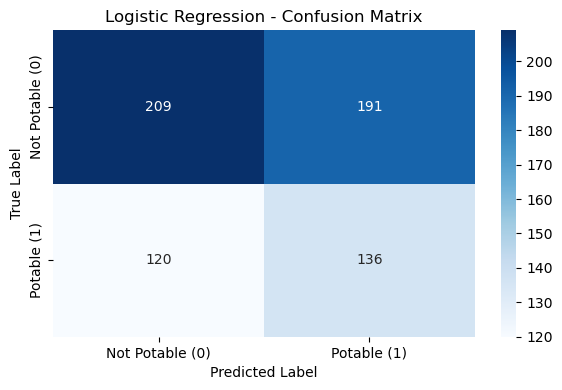

In [22]:
# Train Logistic Regression with class weight to handle imbalance
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Plot confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable (0)", "Potable (1)"],
            yticklabels=["Not Potable (0)", "Potable (1)"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sensitivity (Recall for class 1)
sensitivity = recall

# Specificity (Recall for class 0)
specificity = tn / (tn + fp)

# Print all metrics
print("Logistic Regression Evaluation Metrics")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f} (Sensitivity)")
print(f"Specificity  : {specificity:.4f}")
print(f"Sensitivity  : {sensitivity:.4f}")
print(f"F1 Score     : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)
# Show plot
plt.show()

Random Forest Evaluation Metrics
Accuracy     : 0.6601
Precision    : 0.6514
Recall       : 0.2773 (Sensitivity)
Specificity  : 0.9050
Sensitivity  : 0.2773
F1 Score     : 0.3890

Confusion Matrix:
[[362  38]
 [185  71]]


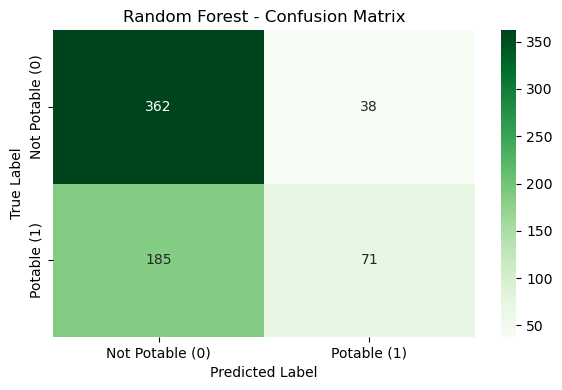

In [23]:
# Train the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)  # Sensitivity
rf_f1 = f1_score(y_test, rf_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

# Graphical Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Not Potable (0)", "Potable (1)"],
            yticklabels=["Not Potable (0)", "Potable (1)"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest - Confusion Matrix")
plt.tight_layout()

# Specificity calculation
rf_tn, rf_fp, rf_fn, rf_tp = rf_cm.ravel()
rf_specificity = rf_tn / (rf_tn + rf_fp)

# Print the results
print("Random Forest Evaluation Metrics")
print(f"Accuracy     : {rf_accuracy:.4f}")
print(f"Precision    : {rf_precision:.4f}")
print(f"Recall       : {rf_recall:.4f} (Sensitivity)")
print(f"Specificity  : {rf_specificity:.4f}")
print(f"Sensitivity  : {rf_recall:.4f}")
print(f"F1 Score     : {rf_f1:.4f}")
print("\nConfusion Matrix:")
print(rf_cm)
plt.show()

SVC Evaluation Metrics
Accuracy     : 0.6204
Precision    : 0.5138
Recall       : 0.5078 (Sensitivity)
Specificity  : 0.6925
Sensitivity  : 0.5078
F1 Score     : 0.5108

Confusion Matrix:
[[277 123]
 [126 130]]


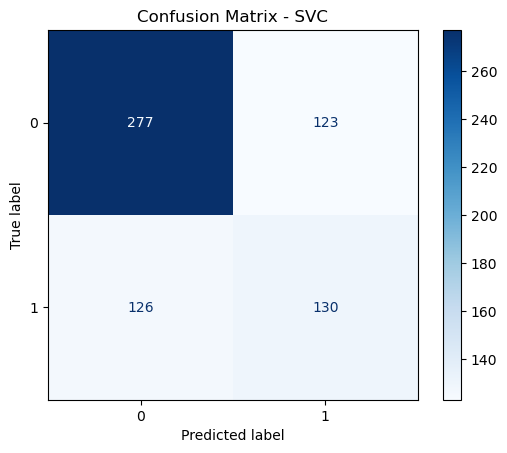

In [24]:
# Train the model
svc_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svc_model.fit(X_train, y_train)

# Predict
svc_preds = svc_model.predict(X_test)

# Evaluation
svc_accuracy = accuracy_score(y_test, svc_preds)
svc_precision = precision_score(y_test, svc_preds)
svc_recall = recall_score(y_test, svc_preds)  # Sensitivity
svc_f1 = f1_score(y_test, svc_preds)
svc_cm = confusion_matrix(y_test, svc_preds)

# Specificity calculation
svc_tn, svc_fp, svc_fn, svc_tp = svc_cm.ravel()
svc_specificity = svc_tn / (svc_tn + svc_fp)

# Print the results
print("SVC Evaluation Metrics")
print(f"Accuracy     : {svc_accuracy:.4f}")
print(f"Precision    : {svc_precision:.4f}")
print(f"Recall       : {svc_recall:.4f} (Sensitivity)")
print(f"Specificity  : {svc_specificity:.4f}")
print(f"Sensitivity  : {svc_recall:.4f}")
print(f"F1 Score     : {svc_f1:.4f}")
print("\nConfusion Matrix:")
print(svc_cm)

# Plot the graphical confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVC")
plt.grid(False)
plt.show()

K-Nearest Neighbors Evaluation Metrics
Accuracy     : 0.6189
Precision    : 0.5185
Recall       : 0.3281 (Sensitivity)
Specificity  : 0.8050
Sensitivity  : 0.3281
F1 Score     : 0.4019

Confusion Matrix:
[[322  78]
 [172  84]]


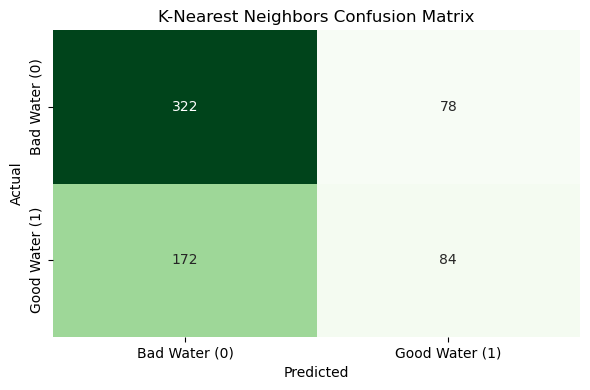

In [25]:
# Train the model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' later
knn_model.fit(X_train, y_train)

# Predict
knn_preds = knn_model.predict(X_test)

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds)
knn_recall = recall_score(y_test, knn_preds)  # Sensitivity
knn_f1 = f1_score(y_test, knn_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

# Specificity calculation
knn_tn, knn_fp, knn_fn, knn_tp = knn_cm.ravel()
knn_specificity = knn_tn / (knn_tn + knn_fp)

# Print the results
print("K-Nearest Neighbors Evaluation Metrics")
print(f"Accuracy     : {knn_accuracy:.4f}")
print(f"Precision    : {knn_precision:.4f}")
print(f"Recall       : {knn_recall:.4f} (Sensitivity)")
print(f"Specificity  : {knn_specificity:.4f}")
print(f"Sensitivity  : {knn_recall:.4f}")
print(f"F1 Score     : {knn_f1:.4f}")
print("\nConfusion Matrix:")
print(knn_cm)

# Graphical Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Bad Water (0)', 'Good Water (1)'],
            yticklabels=['Bad Water (0)', 'Good Water (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.tight_layout()
plt.show()

Gaussian Naive Bayes Evaluation Metrics
Accuracy     : 0.6143
Precision    : 0.5161
Recall       : 0.1875 (Sensitivity)
Specificity  : 0.8875
Sensitivity  : 0.1875
F1 Score     : 0.2751

Confusion Matrix:
[[355  45]
 [208  48]]


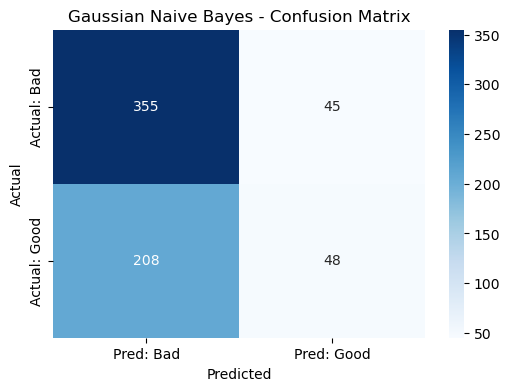

In [26]:
# Train the model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predict
gnb_preds = gnb_model.predict(X_test)

# Evaluation metrics
gnb_accuracy = accuracy_score(y_test, gnb_preds)
gnb_precision = precision_score(y_test, gnb_preds)
gnb_recall = recall_score(y_test, gnb_preds)  # Sensitivity
gnb_f1 = f1_score(y_test, gnb_preds)
gnb_cm = confusion_matrix(y_test, gnb_preds)

# Specificity calculation
gnb_tn, gnb_fp, gnb_fn, gnb_tp = gnb_cm.ravel()
gnb_specificity = gnb_tn / (gnb_tn + gnb_fp)

# Print the results
print("Gaussian Naive Bayes Evaluation Metrics")
print(f"Accuracy     : {gnb_accuracy:.4f}")
print(f"Precision    : {gnb_precision:.4f}")
print(f"Recall       : {gnb_recall:.4f} (Sensitivity)")
print(f"Specificity  : {gnb_specificity:.4f}")
print(f"Sensitivity  : {gnb_recall:.4f}")
print(f"F1 Score     : {gnb_f1:.4f}")
print("\nConfusion Matrix:")
print(gnb_cm)

# Graphical confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred: Bad", "Pred: Good"], yticklabels=["Actual: Bad", "Actual: Good"])
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

MLPClassifier (Neural Network) Evaluation Metrics
Accuracy     : 0.5960
Precision    : 0.4795
Recall       : 0.4102 (Sensitivity)
Specificity  : 0.7150
Sensitivity  : 0.4102
F1 Score     : 0.4421

Confusion Matrix:
[[286 114]
 [151 105]]


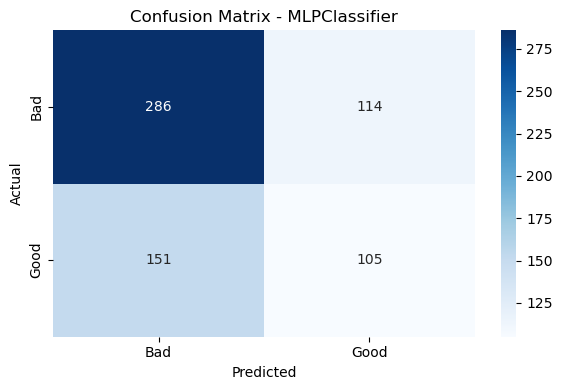

In [27]:
# Train the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict
mlp_preds = mlp_model.predict(X_test)

# Evaluation Metrics
mlp_accuracy = accuracy_score(y_test, mlp_preds)
mlp_precision = precision_score(y_test, mlp_preds)
mlp_recall = recall_score(y_test, mlp_preds)  # Sensitivity
mlp_f1 = f1_score(y_test, mlp_preds)
mlp_cm = confusion_matrix(y_test, mlp_preds)

# Specificity Calculation
mlp_tn, mlp_fp, mlp_fn, mlp_tp = mlp_cm.ravel()
mlp_specificity = mlp_tn / (mlp_tn + mlp_fp)

# Print Results
print("MLPClassifier (Neural Network) Evaluation Metrics")
print(f"Accuracy     : {mlp_accuracy:.4f}")
print(f"Precision    : {mlp_precision:.4f}")
print(f"Recall       : {mlp_recall:.4f} (Sensitivity)")
print(f"Specificity  : {mlp_specificity:.4f}")
print(f"Sensitivity  : {mlp_recall:.4f}")
print(f"F1 Score     : {mlp_f1:.4f}")
print("\nConfusion Matrix:")
print(mlp_cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title("Confusion Matrix - MLPClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [30]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = df.columns[:-1]
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)

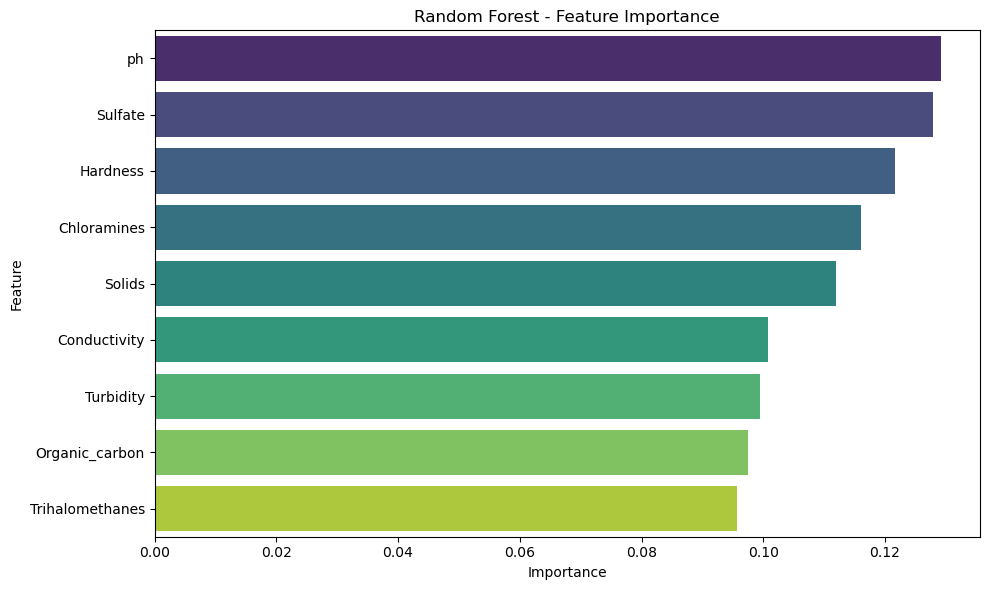

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis", hue="Feature", legend=False)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [37]:
# Cross-Validation to Ensure Generalization (Random Forest)
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.61737805 0.65496183 0.64580153 0.59541985 0.69007634]
Mean Accuracy: 0.6407
Standard Deviation: 0.0324


In [38]:
# Conclusion
print("Random Forest performed best overall. While sensitivity could be improved, it achieved high specificity and accuracy.")
print("Cross-validation confirmed that the model is not overfitting and generalizes well to unseen data.")

Random Forest performed best overall. While sensitivity could be improved, it achieved high specificity and accuracy.
Cross-validation confirmed that the model is not overfitting and generalizes well to unseen data.
